In [2]:
# Source: https://towardsdatascience.com/python-trading-toolbox-05-backtesting-84266edb1d59

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

# This is needed if you're using Jupyter to visualize charts:
%matplotlib inline

datafile = 'CPB.csv'
data = pd.read_csv(datafile, index_col = 'Date')    
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-02,47.389999,47.770000,47.009998,47.770000,41.054787,2547200
2015-09-03,46.910000,48.680000,46.070000,48.529999,41.707958,2364100
2015-09-04,48.230000,48.500000,47.439999,47.939999,41.200890,2019300
2015-09-08,48.500000,49.410000,48.500000,49.380001,42.438469,2458700
2015-09-09,49.779999,49.779999,48.590000,48.720001,41.871243,2198900
...,...,...,...,...,...,...
2020-08-26,52.900002,53.500000,52.389999,53.480000,53.480000,1375400
2020-08-27,53.509998,54.080002,53.259998,53.290001,53.290001,1432100
2020-08-28,53.290001,53.290001,51.930000,52.139999,52.139999,1827300


In [3]:
df = data.copy()
sma_span = 200
ema_span = 20
df['sma200'] = df['Adj Close'].rolling(sma_span).mean()
df['ema20'] = df['Adj Close'].ewm(span=ema_span).mean()
df.round(3)


,Open,High,Low,Close,Adj Close,Volume,sma200,ema20
Date,,,,,,,,
2015-09-02,47.39,47.77,47.01,47.77,41.055,2547200,NaN,41.055
2015-09-03,46.91,48.68,46.07,48.53,41.708,2364100,NaN,41.398
2015-09-04,48.23,48.50,47.44,47.94,41.201,2019300,NaN,41.325
2015-09-08,48.50,49.41,48.50,49.38,42.438,2458700,NaN,41.647
2015-09-09,49.78,49.78,48.59,48.72,41.871,2198900,NaN,41.701
...,...,...,...,...,...,...,...,...
2020-08-26,52.90,53.50,52.39,53.48,53.480,1375400,48.478,51.571
2020-08-27,53.51,54.08,53.26,53.29,53.290,1432100,48.519,51.735
2020-08-28,53.29,53.29,51.93,52.14,52.140,1827300,48.553,51.773


In [4]:
df.dropna(inplace=True)
df.round(3)

,Open,High,Low,Close,Adj Close,Volume,sma200,ema20
Date,,,,,,,,
2016-06-17,62.75,62.75,61.87,62.44,54.582,2064300,49.113,54.320
2016-06-20,62.63,63.15,62.39,62.41,54.556,1459400,49.181,54.343
2016-06-21,62.65,63.21,62.49,62.85,54.940,1161900,49.247,54.400
2016-06-22,63.08,63.08,62.23,62.59,54.713,1395800,49.314,54.429
2016-06-23,62.68,62.92,62.27,62.64,54.757,1177000,49.376,54.461
...,...,...,...,...,...,...,...,...
2020-08-26,52.90,53.50,52.39,53.48,53.480,1375400,48.478,51.571
2020-08-27,53.51,54.08,53.26,53.29,53.290,1432100,48.519,51.735
2020-08-28,53.29,53.29,51.93,52.14,52.140,1827300,48.553,51.773


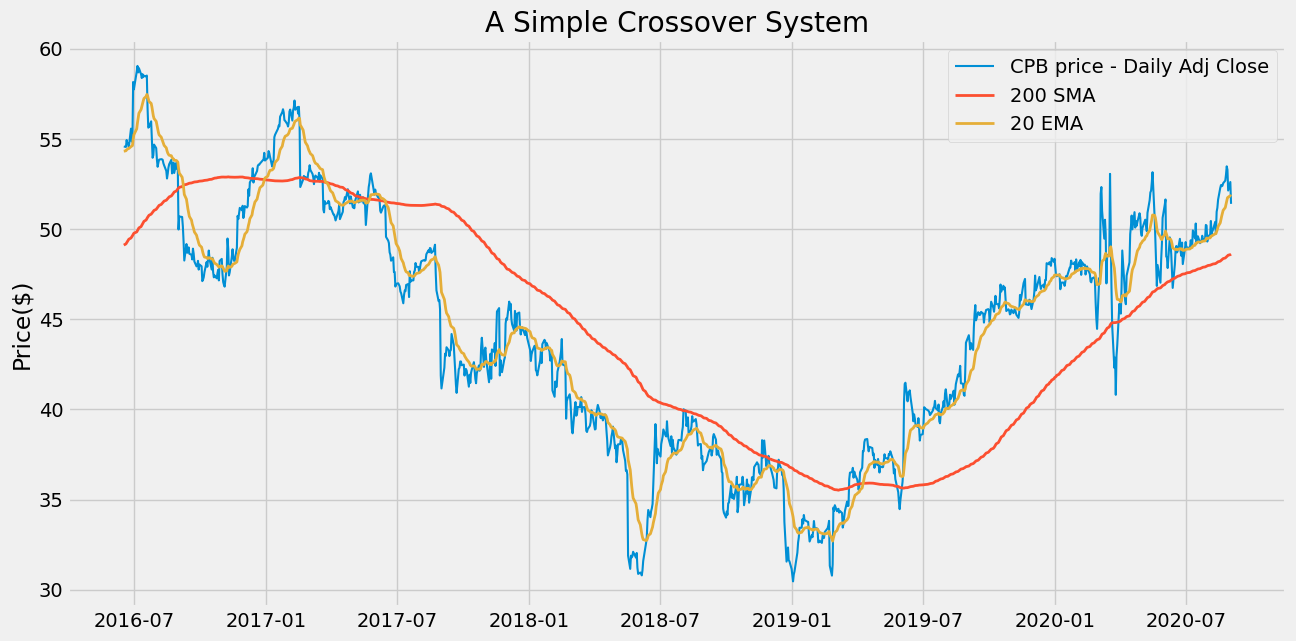

In [5]:
def plot_system1(data):
    df = data.copy()
    dates = df.index
    price = df['Adj Close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='CPB price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.title("A Simple Crossover System")
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

plot_system1(df)

In [6]:
# Our trading condition:
long_positions = np.where(df['ema20'] > df['sma200'], 1, 0)
df['Position'] = long_positions
df.round(3)

,Open,High,Low,Close,Adj Close,Volume,sma200,ema20,Position
Date,,,,,,,,,
2016-06-17,62.75,62.75,61.87,62.44,54.582,2064300,49.113,54.320,1
2016-06-20,62.63,63.15,62.39,62.41,54.556,1459400,49.181,54.343,1
2016-06-21,62.65,63.21,62.49,62.85,54.940,1161900,49.247,54.400,1
2016-06-22,63.08,63.08,62.23,62.59,54.713,1395800,49.314,54.429,1
2016-06-23,62.68,62.92,62.27,62.64,54.757,1177000,49.376,54.461,1
...,...,...,...,...,...,...,...,...,...
2020-08-26,52.90,53.50,52.39,53.48,53.480,1375400,48.478,51.571,1
2020-08-27,53.51,54.08,53.26,53.29,53.290,1432100,48.519,51.735,1
2020-08-28,53.29,53.29,51.93,52.14,52.140,1827300,48.553,51.773,1


In [7]:
buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
df.loc[buy_signals].round(3)


,Open,High,Low,Close,Adj Close,Volume,sma200,ema20,Position
Date,,,,,,,,,
2016-12-30,60.93,61.09,60.33,60.47,53.802,1204500,52.734,52.833,1
2017-05-25,58.45,58.86,57.65,58.83,52.975,1858600,51.651,51.778,1
2019-04-10,39.19,39.57,38.91,39.13,37.678,2936200,35.912,36.021,1


In [8]:
buy_signals_prev = (df['Position'].shift(-1) == 1) & (df['Position'] == 0)
df.loc[buy_signals | buy_signals_prev].round(3)


,Open,High,Low,Close,Adj Close,Volume,sma200,ema20,Position
Date,,,,,,,,,
2016-12-29,60.56,61.02,60.48,60.95,54.229,940200,52.745,52.731,0
2016-12-30,60.93,61.09,60.33,60.47,53.802,1204500,52.734,52.833,1
2017-05-24,58.16,58.43,57.93,58.38,52.570,2204000,51.655,51.652,0
2017-05-25,58.45,58.86,57.65,58.83,52.975,1858600,51.651,51.778,1
2019-04-09,38.46,39.81,38.46,39.49,37.688,5173300,35.903,35.846,0
2019-04-10,39.19,39.57,38.91,39.13,37.678,2936200,35.912,36.021,1


In [9]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
sma200       float64
ema20        float64
Position       int32
dtype: object

In [10]:
def plot_system1_sig(data):
    df = data.copy()
    dates = df.index
    price = df['Adj Close']
    sma200 = df['sma200']
    ema20 = df['ema20']
    
    buy_signals = (df['Position'] == 1) & (df['Position'].shift(1) == 0)
    buy_marker = sma200 * buy_signals - (sma200.max()*.05)
    buy_marker = buy_marker[buy_signals]
    buy_dates = df.index[buy_signals]
    sell_signals = (df['Position'] == 0) & (df['Position'].shift(1) == 1)
    sell_marker = sma200 * sell_signals + (sma200.max()*.05)
    sell_marker = sell_marker[sell_signals]
    sell_dates = df.index[sell_signals]
    
    with plt.style.context('fivethirtyeight'):
        fig = plt.figure(figsize=(14,7))
        plt.plot(dates, price, linewidth=1.5, label='CPB price - Daily Adj Close')
        plt.plot(dates, sma200, linewidth=2, label='200 SMA')
        plt.plot(dates, ema20, linewidth=2, label='20 EMA')
        plt.scatter(buy_dates, buy_marker, marker='^', color='green', s=160, label='Buy')
        plt.scatter(sell_dates, sell_marker, marker='v', color='red', s=160, label='Sell')
        plt.title("A Simple Crossover System with Signals")
        plt.ylabel('Price($)')
        plt.legend()
    
    plt.show() # This is needed only if not in Jupyter

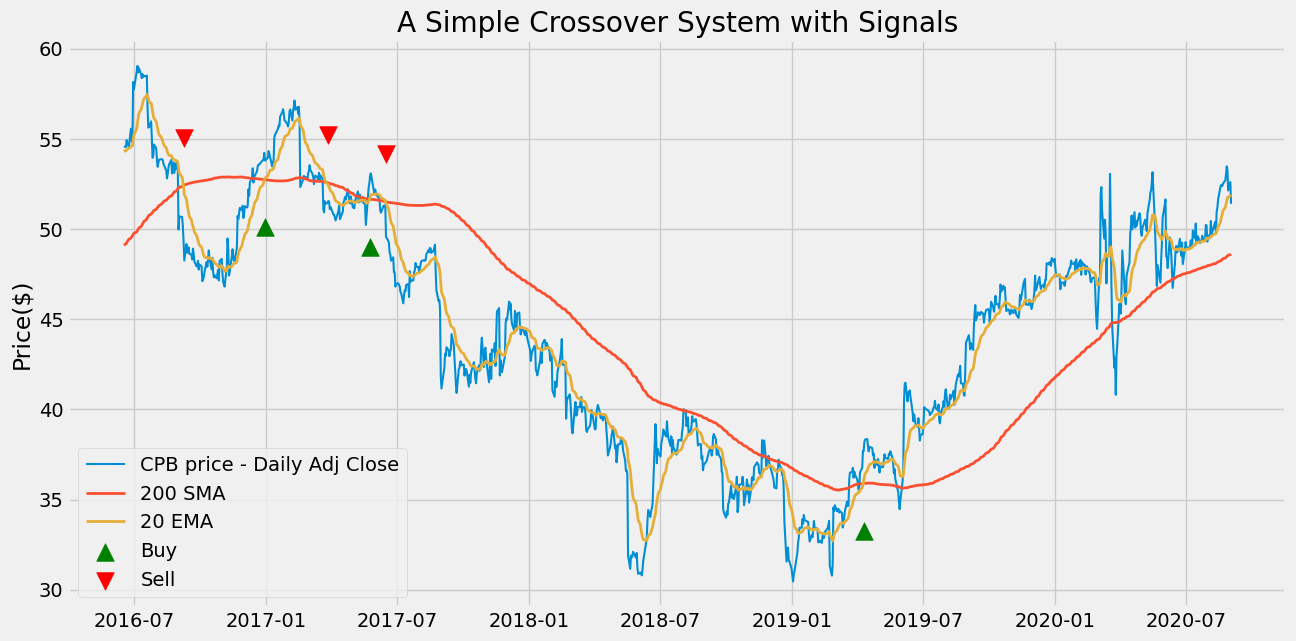

In [11]:
plot_system1_sig(df)